In [36]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, ConnectionPatch

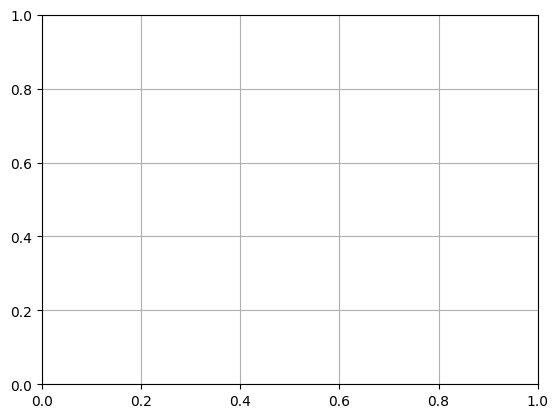

In [2]:
plt.grid(visible=None, which='major', axis='both')
plt.show()

In [19]:
def compute_bfs_tree(nodes, root):
    
    visited = set()  # for storing visited nodes
    parent = {}  # for storing parent nodes
    q = [start]  # for storing nodes to be visited
    visited.add(root)  # mark the start node as visited

    while q:  # while the queue Q is not empty, continue the traversal
        current_node = q.pop(0)  # dequeue current node
        for neighbor in g[current_node]:  # loop over neighbors of current node
            
            
            if neighbor not in visited:  # if neighbor has not been visited
                q.append(neighbor)  # enqueue neighbor
                visited.add(neighbor)  # mark neighbor as visited
                parent[neighbor] = current_node  # set current node as parent of neighbor

    return parent  # return the tree structure


def compute_dfs_tree(nodes, root):
    visited = set()  # for storing visited nodes
    parent = {}
    
    def dfs(g, root):
        if root not in visited:
            visited.add(root)
            for n in g[root]: 
                parent[n] = root # set 'root' as parent
                dfs(g, n) # recursive call to go into depth for each neighboring node
                
    dfs(g,root)
                
    return parent

In [20]:
compute_dfs_tree(graph, '5')

{'3': '5', '2': '3', '5': '2', '4': '3', '8': '7', '7': '5'}

One standard way to get a BFS tree from a graph is to run BFS and, as you do so, keep a table mapping each node in the graph to its parent in the tree. You populate it as follows: the source node has no parent (it's the root, after all). Then, whenever you're processing a node u and explore one of its unexplored neighbors v, you set v's parent to be u. Try tracing this out on some small examples and you'll see that this implicitly builds up the tree, except with the edges going backwards (edges point from children up to parents rather than the other way around). You can then just reverse the edges to get back the BFS tree.

In [42]:
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}
tree=convert_to_binary_tree(graph, '5','bfs')
tree.generate_coordinates()
tree.draw_tree()

AttributeError: 'BinaryTreeNode' object has no attribute 'coordinates'

In [41]:

class Node:
    def __init__(self, label):
        self.label = label
        self.coordinates : tuple
        self.neighbours = [] # adjacency_list
        self.weights = {} # store weight values in dictionary {node_labe: weight}

    def add_neighbour(self, new_neighbour):
        self.neighbours.append(new_neighbour)

class BinaryTreeNode(Node):
    def __init__(self, label):
        super().__init__(label)
        self.left = None
        self.right = None
        self.parent = None

        self.horizontal_displacement = 0
        self.level = 0
    
    def get_level(self): # count number of parents above self
        self.level = 0
        current_parent = self.parent
        while current_parent: # while parent exists
            current_parent = current_parent.parent # check parent of parent recursively
            self.level += 1 # increase level count
        return self.level
    
    def generate_coordinates(self):
        c = 0
        def inorder(root,c):
            if root is None:
                return
            # Traverse left subtree
            inorder(root.left, c)
            #
            root.coordinates[0] = c, root.get_level()
            c += 1
            # Traverse right subtree
            inorder(root.right, c)
        inorder(self, c)
        
    def print_tree(self):
        spaces = ' ' * self.get_level() * 3
        prefix = spaces + "|__" if self.parent else ""

        print(prefix + self.label)
        if self.left or self.right:
            if self.left:
                self.left.print_tree()
            if self.right:
                self.right.print_tree()
    
    def draw_tree(self):
        fig = plt.figure(figsize=(5,5))
        plt.grid(visible=None, which='major', axis='both')
        ax = fig.gca()
        

        ax.add_patch(Circle(xy=self.coordinates, radius= .5, color = 'green', alpha=.5))
        
        if self.left or self.right:
            if self.left:
                self.left.draw_tree()
            if self.right:
                self.right.draw_tree()
                
            
    
        
def convert_to_binary_tree(graph, start_node, method='bfs'):
    if method.lower() == 'bfs':
        return bfs(graph, start_node)
    elif method.lower() == 'dfs':
        return dfs(graph, start_node)
    else:
        raise ValueError("Invalid method. Choose either 'bfs' or 'dfs'.")

def bfs(graph, start_node):
    root = BinaryTreeNode(start_node)
    queue = [root]  # Initialize the queue with the root
    visited = set([start_node])

    while queue:
        current_node = queue.pop(0)
        for neighbor in graph[current_node.label]:
            if neighbor not in visited:
                visited.add(neighbor)
                new_node = BinaryTreeNode(neighbor)
                if current_node.left is None:
                    current_node.left = new_node
                    new_node.parent = current_node
                else:
                    current_node.right = new_node
                    new_node.parent = current_node

                queue.append(new_node)

    return root

def dfs(graph, node_label, parent=None):
    root = BinaryTreeNode(node_label)
    for neighbor in graph[node_label]:
        if parent and neighbor == parent.label:
            continue
        if not parent:
            parent = root
        if not parent.left:
            parent.left = dfs(graph, neighbor, root)
        elif not parent.right:
            parent.right = dfs(graph, neighbor, root)
    return root

def get_inordered_nodes(root):
    inordered_nodes = []
    def inorder(root):
        if root is None:
            return
        # Traverse left subtree
        inorder(root.left)
        # "visit root" add to dict
        inordered_nodes.append(root)
        # Traverse right subtree
        inorder(root.right)
    inorder(root)
    return inordered_nodes

In [ ]:
tree.

In [28]:
inordered_nodes = get_inordered_nodes(tree)

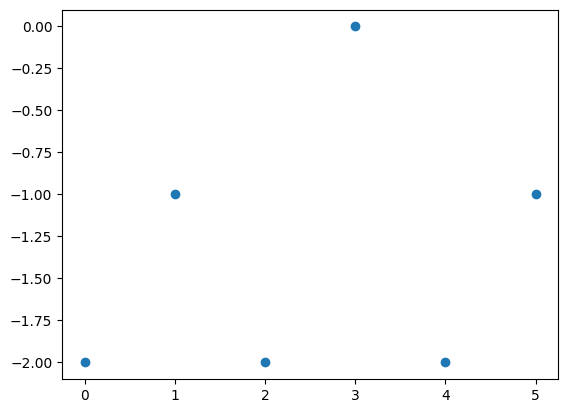

In [32]:
xs, ys = [], []
for i, node in enumerate(inordered_nodes):
    xs.append(i)
    ys.append(-node.get_level())
    
plt.scatter(xs, ys)